In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [17]:
df=pd.read_csv('../resources/Excel_sheets/titanic.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


moving target feature 'Survived' to last and lower_casing names for easiness

In [18]:
cols=df.columns.to_list()
cols.append(cols.pop(cols.index('Survived')))
df=df[cols]
df.columns=df.columns.str.lower()
df.head(2)

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


In [19]:
df.shape

(891, 12)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   name         891 non-null    object 
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   ticket       891 non-null    object 
 8   fare         891 non-null    float64
 9   cabin        204 non-null    object 
 10  embarked     889 non-null    object 
 11  survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Cleaning of Data

In [21]:
df=df[['pclass','sex','age','fare','survived']]
df.head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [22]:
df.isnull().sum()

pclass        0
sex           0
age         177
fare          0
survived      0
dtype: int64

In [23]:
df.age.fillna(int(df.age.median()),inplace=True)

In [24]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [25]:
le_sex=LabelEncoder()
df.sex=le_sex.fit_transform(df.sex)

In [26]:
df.sex[0:4]

0    1
1    0
2    0
3    0
Name: sex, dtype: int32

<AxesSubplot:>

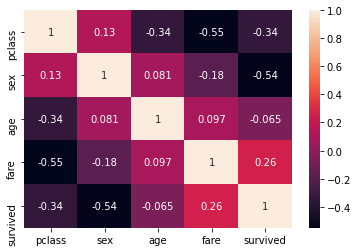

In [27]:
sns.heatmap(df.corr(),annot=True)

## Data Preprocessing

In [32]:
X=df.drop('survived',axis=1).values
y=df.survived.values

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [73]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

DecisionTreeClassifier()

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8379888268156425